In [1]:
import pyfeyn2
from feynml import *
from pyfeyn2.render.eps.madgraph import MadgraphRender

from pyfeyn2.auto.label import auto_label, LabelType
from pyfeyn2.auto.position import auto_position,scale_positions

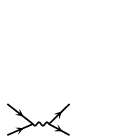

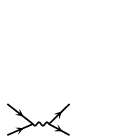

In [2]:


fd = FeynmanDiagram().add(
    v1 := Vertex(),
    v2 := Vertex(),
    Propagator(pdgid=22).connect(v1,v2),
    Leg(pdgid=1,target=v1,sense='incoming'),
    Leg(pdgid=1,target=v1).with_incoming(),
    Leg(pdgid=11,sense='outgoing').with_target(v2),
    Leg(pdgid=11).with_target(v2).with_outgoing(),
)

#auto_label(fd.propagators + fd.legs,label_type=LabelType.UNICODE)
fd = auto_position(fd)
fd = scale_positions(fd,10)
MadgraphRender(fd).render(file="demo")

In [3]:
print(fd)

FeynmanDiagram(id='FeynmanDiagram8', style=cssutils.css.CSSStyleDeclaration(cssText='layout: neato'), clazz=None, propagators=[Propagator(id='Propagator11', pdgid=22, name='gamma', type='photon', particle=<Particle: name="gamma", pdgid=22, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, source='Vertex9', target='Vertex10')], vertices=[Vertex(id='Vertex9', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=23.745580847236866, y=10.798548657197792, z=None, label=None, shape=None), Vertex(id='Vertex10', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=35.233827451466844, y=10.77249891459406, z=None, label=None, shape=None)], legs=[Leg(id='Leg12', pdgid=1, name='d', type='fermion', particle=<Particle: name="d", pdgid=1, mass=4.67 + 0.50 - 0.20 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, target='Vertex9', x=5.343608509582585, y=2.7910438504000497, z=

In [4]:
from pyfeyn2.interface.eps import eps_to_feynml
fml = eps_to_feynml("../tests/interface/lo.ps")

/home/apn/git/feynml/feynml/pdgid.py:101: UserWarning: Type fermion is not consistent with pdgid -11, which is anti fermion. Using fermion now.
  warnings.warn(
/home/apn/git/feynml/feynml/pdgid.py:101: UserWarning: Type photon is not consistent with pdgid 23, which is boson. Using photon now.
  warnings.warn(


In [5]:
print(fml.diagrams[0])

FeynmanDiagram(id='FeynmanDiagram16', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, propagators=[Propagator(id=9, pdgid=22, name='gamma', type='photon', particle=<Particle: name="gamma", pdgid=22, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, source=7, target=2)], vertices=[Vertex(id=2, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=141.66667, y=635.0, z=None, label=None, shape=None), Vertex(id=7, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=208.33333, y=635.0, z=None, label=None, shape=None)], legs=[Leg(id=3, pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, target=2, x=75.0, y=560.0, z=None, shape=None, sense='incoming', external=None), Leg(id=6, pdgid=-2, name='u~', type='anti fermion', particle=<Particle: name="u~", pdgid=-2, 

In [6]:
fml.diagrams[0].legs

[Leg(id=3, pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, target=2, x=75.0, y=560.0, z=None, shape=None, sense='incoming', external=None),
 Leg(id=6, pdgid=-2, name='u~', type='anti fermion', particle=<Particle: name="u~", pdgid=-2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, target=2, x=75.0, y=710.0, z=None, shape=None, sense='incoming', external=None),
 Leg(id=12, pdgid=-11, name='e+', type='fermion', particle=<Particle: name="e+", pdgid=-11, mass=0.51099895000 ± 0.00000000015 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, target=7, x=263.80335, y=572.59623, z=None, shape=None, sense='outgoing', external=None),
 Leg(id=15, pdgid=11, name='e-', type='fermion', particle=<Particle: name="e-", pdgid=11, mass=0.51099895000 

In [7]:
fml.diagrams[0].propagators

[Propagator(id=9, pdgid=22, name='gamma', type='photon', particle=<Particle: name="gamma", pdgid=22, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, source=7, target=2)]

In [8]:
fml.diagrams[0].vertices

[Vertex(id=2, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=141.66667, y=635.0, z=None, label=None, shape=None),
 Vertex(id=7, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=208.33333, y=635.0, z=None, label=None, shape=None)]

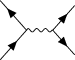

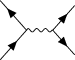

In [9]:
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
TikzFeynmanRender(scale_positions(fml.diagrams[0],1./100.)).render()

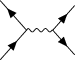

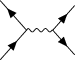

In [10]:
TikzFeynmanRender(scale_positions(fml.diagrams[1],1./100.)).render()

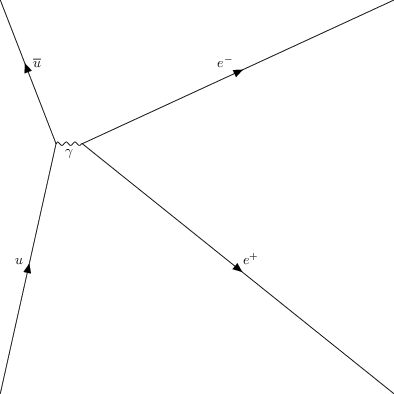

In [11]:
fml.diagrams[0]